### Factor Analysis of Toothpaste Survey Questions

In [2]:
#Import all the necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import Rotator, FactorAnalyzer

#To enable plotting in Jupyter Notebook
%matplotlib inline

In [3]:
#Load the 'csv' file
df = pd.read_csv("PCA-nm.csv")
df.head()

,PreventCav,ShinyTeeth,StrengthGum,Fresh,Decay,Attractive
0,7,3,6,4,2,4
1,1,3,2,4,5,4
2,6,2,7,4,1,3
3,4,5,4,6,2,5
4,1,2,2,3,6,2


In [4]:
#Factor Analysis
fa = FactorAnalyzer(n_factors=6, rotation=None)
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation=None, rotation_kwargs={},
               use_smc=True)

In [5]:
#Factor Loadings
fa.loadings_

array([[ 0.95918811,  0.17556875, -0.15680063,  0.13854481,  0.01878815,
         0.        ],
       [-0.21174249,  0.73009791,  0.04577852,  0.21610033, -0.0564725 ,
         0.        ],
       [ 0.93568743,  0.04488872,  0.22916581,  0.01705503,  0.06808136,
         0.        ],
       [-0.25386625,  0.74876413, -0.21149323, -0.06388534,  0.08368224,
         0.        ],
       [-0.85266382, -0.26546652,  0.10230094,  0.15350432,  0.08568018,
         0.        ],
       [-0.10633984,  0.8659057 ,  0.19555888, -0.10887884, -0.00581736,
         0.        ]])

In [9]:
#Eigen Values of the 6 dimensions
fa.get_eigenvalues()

(array([2.73118833, 2.21811927, 0.44159791, 0.34125765, 0.18262823,
        0.08520861]),
 array([ 2.64317969e+00,  1.94679538e+00,  1.72637406e-01,  1.05684567e-01,
         2.25549680e-02, -8.03944575e-07]))

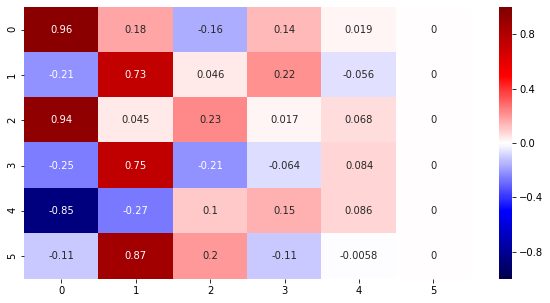

In [7]:
#Heatmap of the Factor Loadings
plt.figure(figsize=(10,5))
sns.heatmap(fa.loadings_, cmap='seismic', annot=True, vmin=-1, vmax=1)

In [11]:
#Iteration 2 - Factor Analysis reducing the number of dimension to 2
fa1 = FactorAnalyzer(n_factors=2, rotation='varimax')
fa1.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [12]:
#Iteration 2 - Factor Loadings
fa1.loadings_

array([[ 0.96340527, -0.0353135 ],
       [-0.05031349,  0.74740743],
       [ 0.90105235, -0.15455031],
       [-0.08645543,  0.76898928],
       [-0.88486744, -0.07482967],
       [ 0.07887818,  0.8475578 ]])

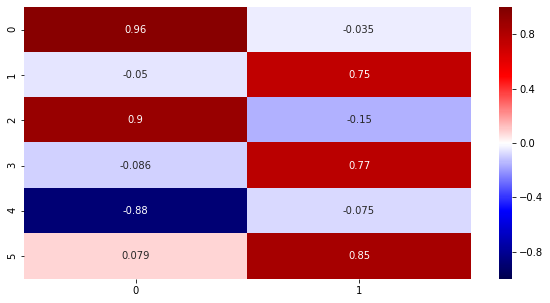

In [13]:
#Iteration 2 - Heatmap of the Factor Loadings
plt.figure(figsize=(10,5))
sns.heatmap(fa1.loadings_, cmap='seismic', annot=True, vmin=-1, vmax=1)

In [14]:
#Transform the data - Reducing to 2 Dimensions
fa1.transform(df)

array([[ 1.33478791, -0.20678635],
       [-1.29945947, -0.26658665],
       [ 1.15554837, -0.86650512],
       [ 0.14425562,  0.94671736],
       [-1.4801442 , -1.41775158],
       [ 1.00956206, -0.25814599],
       [ 0.46293172, -0.93728166],
       [ 1.18494605, -0.1266024 ],
       [-0.80029481, -0.57512958],
       [-1.10655026,  1.4152962 ],
       [ 1.05081689, -0.72387061],
       [-1.07950018, -0.13025677],
       [ 1.37550766, -0.73017524],
       [ 0.12039551,  1.27123655],
       [-1.35301552, -0.69483388],
       [ 0.92198847, -0.30151749],
       [ 0.61392051, -0.53888315],
       [ 1.52732981, -0.26124878],
       [-1.0202541 , -0.71145946],
       [-0.39707398,  1.28720303],
       [-1.34631331, -0.83334705],
       [ 0.56191174, -0.03852936],
       [-0.9919266 , -0.08688526],
       [ 0.07997403,  1.80748913],
       [ 0.88570771, -0.08342506],
       [-0.22809393,  1.57012348],
       [ 0.54465176, -0.2896782 ],
       [-0.72779675,  0.64051322],
       [ 0.13239847,

In [19]:
#New data for further analysis
new_df = pd.DataFrame(fa1.transform(df), columns=('Teeth Health', 'Teeth Aesthetics'))
new_df.head(30)

,Teeth Health,Teeth Aesthetics
0,1.334788,-0.206786
1,-1.299459,-0.266587
2,1.155548,-0.866505
3,0.144256,0.946717
4,-1.480144,-1.417752
5,1.009562,-0.258146
6,0.462932,-0.937282
7,1.184946,-0.126602
8,-0.800295,-0.575130
9,-1.106550,1.415296
